# **Análisis Exploratorio de Datos**

## **Librerías**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.options.display.max_columns = False

In [3]:
import palmerpenguins

In [4]:
import sklearn.metrics

In [5]:
import scipy.stats

import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats as ss

In [6]:
penguin_color = {
    'Adelie': '#ff6602ff',
    'Gentoo': '#0f7175ff',
    'Chinstrap': '#c65dc9ff'
}

## **Datos**

### **1. Colecta y validación de datos**

In [7]:
penguins_data = sns.load_dataset('penguins')
penguins_data

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [8]:
# ¿Qué tipo de datos son las variables del conjunto?
penguins_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


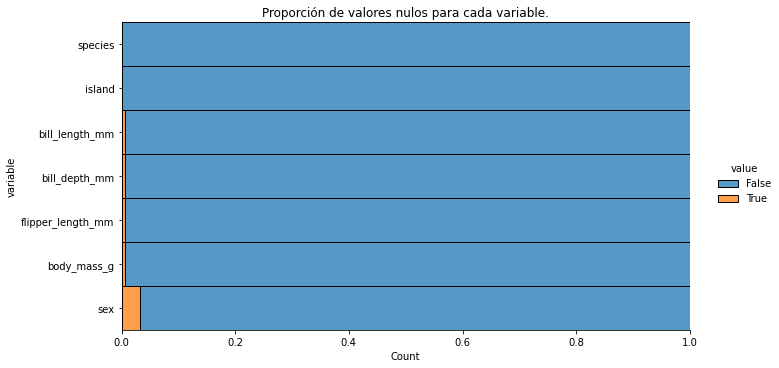

In [9]:
# Proporción de valores nulos para cada variable.

(penguins_data
    .isnull()
    .melt()
    .pipe(
        lambda df:(
            sns.displot(
                data = df,
                y = 'variable',
                hue = 'value',
                multiple = 'fill',
                aspect = 2
            )
        )
    ))

plt.title('Proporción de valores nulos para cada variable.')

plt.show()

In [10]:
# Eliminar valores nulos

penguins_data.dropna(inplace=True)
penguins_data.reset_index(drop=True, inplace=True)

In [11]:
penguins_data

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
328,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
329,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
330,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
331,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


## **Análisis**

### **1. Análisis Univariado**

In [14]:
# Estadísticos que describen al conjunto de datos 
penguins_data.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


#### **1.1 Conteo de Valores**

**Con Pandas**

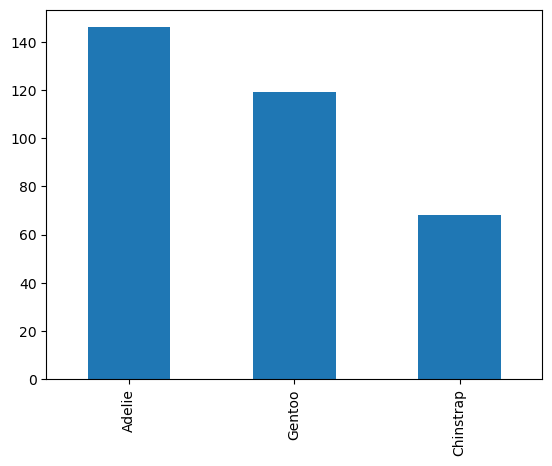

In [15]:
penguins_data['species'].value_counts().plot(kind='bar')
plt.show()

**Con Seaborn**

In [17]:
penguins_data_species = pd.DataFrame(penguins_data['species'].value_counts()).reset_index()
penguins_data_species.columns = ['species', 'penguins']
penguins_data_species

,species,penguins
0,Adelie,146
1,Gentoo,119
2,Chinstrap,68


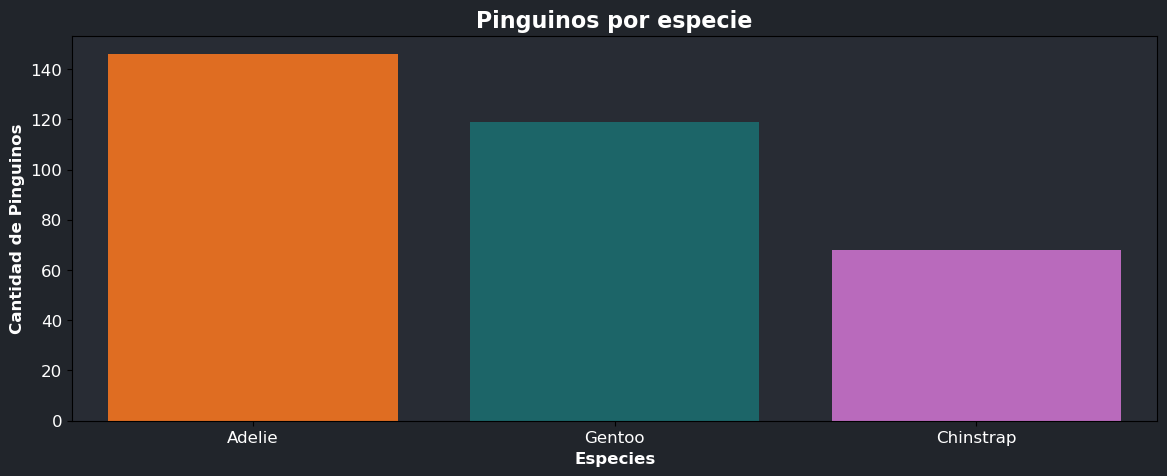

In [18]:
fig, ax = plt.subplots(figsize=(14, 5))

plt.title(
    'Pinguinos por especie', 
    fontweight=1000, 
    size=16, 
    color='white'
)

# plt.grid(visible=True, linewidth=0.1, color='white')
fig.patch.set_facecolor('#21252b') 
ax.set_facecolor('#282c34') 

sns.barplot(
    data=penguins_data_species, 
    x='species', 
    y='penguins',
    palette =penguin_color
)

plt.xlabel('Especies', size=12, weight=700, color='white')
plt.xticks(color='white', size=12)

plt.ylabel('Cantidad de Pinguinos', size=12, weight=700, color='white')
plt.yticks(color='white', size=12)

plt.show()

#### **1.2 Graficando las proporciones**

In [81]:
penguins_x_island = pd.crosstab(index=penguins_data['island'], columns=penguins_data['species']).reset_index()
penguins_x_island.columns = ['island', 'Adelie', 'Chinstrap', 'Gentoo']
penguins_x_island.set_index('island', inplace=True)
penguins_x_island

,Adelie,Chinstrap,Gentoo
island,,,
Biscoe,44,0,119
Dream,55,68,0
Torgersen,47,0,0


In [96]:
r = [i for i in range(len(penguins_x_island))]

totals = [i+j+k for i,j,k in zip(penguins_x_island['Adelie'], penguins_x_island['Chinstrap'], penguins_x_island['Gentoo'])]
adelie_Bars = [i / j * 100 for i,j in zip(penguins_x_island['Adelie'], totals)]
chinstrap_Bars = [i / j * 100 for i,j in zip(penguins_x_island['Chinstrap'], totals)]
gentoo_Bars = [i / j * 100 for i,j in zip(penguins_x_island['Gentoo'], totals)]

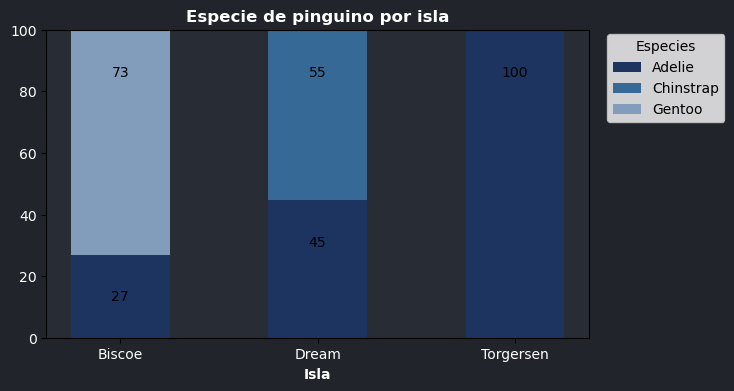

In [200]:
# plot
barWidth = 0.5
names = list(penguins_x_island.index)
y_offset = -15

# fig, ax = plt.subplots()
fig, ax = plt.subplots(figsize=(7, 4))

plt.title(
    'Especie de pinguino por isla', 
    fontweight=1000, 
    size=12, 
    color='white'
)

fig.patch.set_facecolor('#21252b') 
ax.set_facecolor('#282c34') 

# Create Bars
plt.bar(r, adelie_Bars, color='#1d3461', width=barWidth, label='Adelie')
plt.bar(r, chinstrap_Bars, bottom=adelie_Bars, color='#376996', width=barWidth, label='Chinstrap')
plt.bar(r, gentoo_Bars, bottom=[i+j for i,j in zip(adelie_Bars, chinstrap_Bars)], color='#829cbc', width=barWidth, label='Gentoo')
 
# Custom axis
plt.xticks(r, names, color='white', size=10)
plt.xlabel("Isla", fontweight=1000,color='white')
 
plt.yticks(color='white', size=10)
    
# Add labels
for bar in ax.patches:
    if bar.get_height() != 0:
        ax.text(
          bar.get_x() + bar.get_width() / 2,
          bar.get_height() + bar.get_y() + y_offset,
          f'{round(bar.get_height())}',
          ha='center',
          color='black',
          size=10
      )    
        
plt.legend(loc='lower right', title='Especies', bbox_to_anchor=(1.25, 0.7), borderaxespad=0)

# Show graphic
plt.show()